In [2]:
# Importing Libaries to create plots, and load data from Excel
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import matplotlib.cm as cm
import numpy as np
import pandas as pd
import os
import math


In [3]:

file = r'D:\UNI\MILJOETEK\4. semester\Calculations\Data.xlsx'
data = pd.read_excel(file, sheet_name='Annual emissions net savings')

save_dir = r'D:\UNI\MILJOETEK\4. semester\Calculations\Hospital_CDU_MDU'
# Create the directory if it doesn't exist
os.makedirs(save_dir, exist_ok=True)

legend_ = data['Hospital'].to_list()
MDU = data['RSMDU'].to_list()
CDU = data['RSCDU'].to_list()
Bought = data['RSPDU'].to_list()
Recommended = data['RSREC'].to_list()

cols = data.columns
cols_plot = cols[1:5]
cols_legend = cols[0]

In [4]:

plot_legend = [ 'RSMDU',
               'RSCDU',
                'RSPDU ',
                'RSREC',
]

C:\Users\rwint\AppData\Local\Temp\ipykernel_19244\3169924612.py:1: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('tab20')


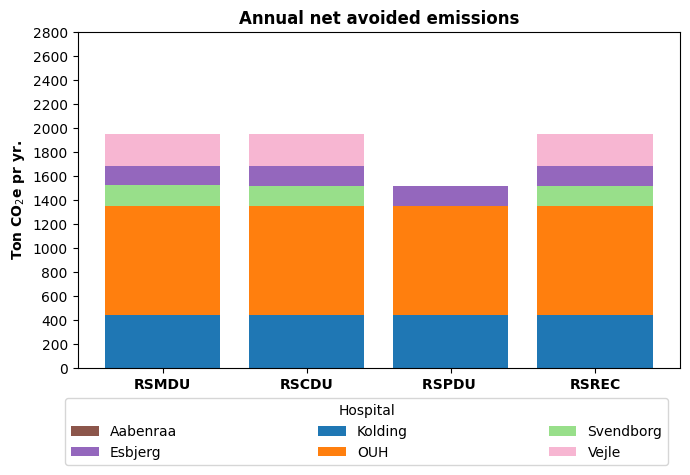

In [5]:
cmap = plt.cm.get_cmap('tab20')
colors = [cmap(i) for i in np.linspace(0, 1.5, 12)]

# Create a figure and axis object
fig, ax = plt.subplots(figsize=(7, 5))

# Calculate the positions for the bars
x = np.arange(4)


# Plot the stacked bar for MDU sc1
bottom_pos = np.zeros(len(data['Unit']))

for j in range (len(cols_plot)):
    for i, (share, item) in enumerate(zip(data[cols_plot[j]], data[cols_legend])):
        ax.bar(x[j], share, bottom=bottom_pos, label=item, color=colors[i])
        #ax.text(x[j], bottom_pos[-1] + share / 2, f"{share:.2f}", ha='center', va='center', color='black', fontsize=8)
        bottom_pos += share
    bottom_pos = np.zeros(len(data['Unit']))



# Add labels, title, and legend
ax.set_ylabel('Ton CO$_2$e pr yr.', weight='bold')
ax.set_title('Annual net avoided emissions', weight='bold')
ax.set_xticks(x)
ax.set_xticklabels(plot_legend, weight='bold')

# Create a custom legend with unique items
handles, labels = ax.get_legend_handles_labels()
unique_labels = sorted(set(labels))  # Get unique items and sort alphabetically
unique_handles = [handles[labels.index(label)] for label in unique_labels]  # Corresponding handles

# Add title to legend
legend_title = "Hospital"
ax.legend(unique_handles, unique_labels, title=legend_title, bbox_to_anchor=(-0.02, -0.29, 1, 0.2), loc="lower left",
            mode="expand", borderaxespad=0, ncol=3)
plt.yticks(np.arange(0,2801, step=200))
# Show the plot
plt.tight_layout()
plt.savefig(os.path.join(save_dir, 'Annual_emissions.jpg'), bbox_inches='tight')
plt.show()

In [6]:

data_cost = pd.read_excel(file, sheet_name='Annual cost Hospitals')



MDU_cost = data_cost['RSMDU'].to_list()
CDU_cost = data_cost['RSCDU'].to_list()
Bought_cost = data_cost['RSPDU'].to_list()
Recommended_cost = data_cost['RSREC'].to_list()

cols = data.columns
cols_plot_cost = cols[1:5]
cols_legend_cost = cols[0]

C:\Users\rwint\AppData\Local\Temp\ipykernel_19244\3082947279.py:1: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('tab20')


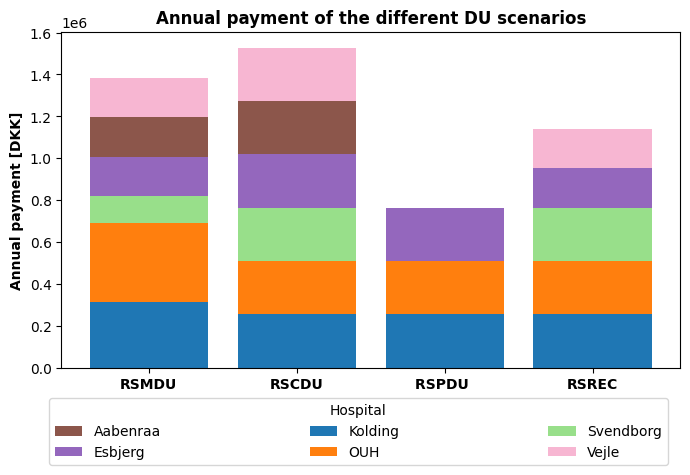

In [7]:
cmap = plt.cm.get_cmap('tab20')
colors = [cmap(i) for i in np.linspace(0, 1.5, 12)]

# Create a figure and axis object
fig, ax = plt.subplots(figsize=(7, 5))

# Calculate the positions for the bars
x = np.arange(4)


# Plot the stacked bar for MDU sc1
bottom_pos = np.zeros(len(data_cost['Hospital']))

for j in range (len(cols_plot_cost)):
    for i, (share, item) in enumerate(zip(data_cost[cols_plot_cost[j]], data_cost[cols_legend_cost])):
        ax.bar(x[j], share, bottom=bottom_pos, label=item, color=colors[i])
        #ax.text(x[j], bottom_pos[-1] + share / 2, f"{share:.2f}", ha='center', va='center', color='black', fontsize=8)
        bottom_pos += share
    bottom_pos = np.zeros(len(data_cost['Hospital']))



# Add labels, title, and legend
ax.set_ylabel('Annual payment [DKK]', weight='bold')
ax.set_title('Annual payment of the different DU scenarios', weight='bold')
ax.set_xticks(x)
ax.set_xticklabels(plot_legend, weight='bold')

# Create a custom legend with unique items
handles, labels = ax.get_legend_handles_labels()
unique_labels = sorted(set(labels))  # Get unique items and sort alphabetically
unique_handles = [handles[labels.index(label)] for label in unique_labels]  # Corresponding handles

# Add title to legend
legend_title = "Hospital"
ax.legend(unique_handles, unique_labels, title=legend_title, bbox_to_anchor=(-0.02, -0.29, 1, 0.2), loc="lower left",
            mode="expand", borderaxespad=0, ncol=3)
#plt.yticks(np.arange(0,2601, step=200))
# Show the plot
plt.tight_layout()
plt.savefig(os.path.join(save_dir, 'Annual_cost_hospitals.jpg'), bbox_inches='tight')
plt.show()